# Importing Transactions CSV into Python
In this playbook I want to mirror my transaction journal I maintain in Excel and on in the weekly trading journal entries on my website (www.blueskynomad.com). The goal is to save time, improve data quality and being able to do more analysis.

I am using the transactions CSV downloaded from Tastytrade for the first year of my options trading. At a later stage I want to add/merge/parse also the 'Year-to-Date'and my Positions data which I download daily. The idea is that I only have to upload the lastest transactions overview and  load it into this notebook. I will do the same for my Interacyive Brokers' transactions. As a next project, I want to use TastyTrade's and IB's APIs to automate this.

I also set up a playbook for learning pandas and testing set-ups. A few of the challenges I encountered and still have are related to cleaning up and preparing the data for use: converting objects to numbers and datetime formats, dealing with thousand separators and empty cells, indexing, etc.

I already found out that using www.poe.com to assist me in setting this all up and finding answers to questions I have, really helps. I tried to find examples of this challenge in Stack Overflow and other sites but didn't yet find anything, so I intend to publish my questions also there and in the the PyquantNews'(PQN) community (www.pyquantnews.com). (Note: I just found a link in the PQN community added by Yong Shen Tan that may help and that I will check out: https://github.com/tys203831/portfolio_analysis).

Being a noob in Python and algorhythmic trading, I followed Jason Strimpel's excellent Getting Started With Python for Quant Finance (https://gettingstartedwithpythonforquantfinance.com/) course which taught me most of what I applied below. In addition I watched Corey Schaefer's YouTube pandas tutorials in parallel. I installed the 'quant stack' modules used also in the course.

pandas

NumPy

SciPy

Matplotlib

Statsmodels

Pyfolio

IB API

QuantStats

Zipline

OpenBB SDK

RiskFolio-Lib

In [1]:
#Python version used
!python -V

Python 3.9.16


In [2]:
#Overview of modules used
!pip freeze

aiodns==3.0.0
aiofiles==22.1.0
aiohttp==3.8.4
aiosignal==1.3.1
aiosqlite==0.18.0
alembic==1.10.2
alpha-vantage==2.3.1
altair==4.2.2
ansiwrap==0.8.4
anyio==3.6.2
appdirs==1.4.4
arch==5.3.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
ascii-magic==1.6
astor==0.8.1
astropy==5.2.2
asttokens==2.2.1
async-timeout==4.0.2
attrs==22.2.0
Babel==2.12.1
backcall==0.2.0
backoff==2.2.1
base58==2.1.1
bcolz-zipline==1.2.6
beautifulsoup4==4.12.0
bleach==6.0.0
blinker==1.5
blosc2==2.0.0
Bottleneck==1.3.7
bs4==0.0.1
bt==0.2.9
cachetools==5.3.0
ccxt==2.9.16
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==2.1.1
click==8.1.3
colorama==0.4.6
comm==0.1.3
commonmark==0.9.1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cssselect==1.2.0
cvxpy @ file:///D:/bld/cvxpy-split_1679187643110/work
cycler==0.11.0
Cython==0.29.33
dateparser==1.1.8
DateTime==5.1
debugpy==1.6.6
decorator==5.1.1
defusedxml==0.7.1
degiro-connector==2.0.21
detecta==0.0.5
dnspython==2.3.0
ecos @ file:///D:/bld/ec

In [3]:
#importing and 'shorthanding' main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set dosplay rows and columns and their width as required:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [4]:
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/BlueskyNomadQuant/TT_transactions_1st_year_2022.csv')
#Note: I first copied the path but had to change the back slashes to forward slashes to make this work. 

In [5]:
#na_values was added to capture potential missing or other data in the set causing errors. 
na_vals = ['NA', '--']

#importing the csv I downloaded from Tastytrade and creating the dataframe, telling pandas what the thousands separator looks like
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/BlueskyNomadQuant/TT_transactions_1st_year_2022.csv', thousands=',', na_values=na_vals)

I copied the path and had to change the back slashes in the copied path to forward slashes.

na_values was added to capture potential missing or other data in the set causing errors. This is used to create a string that considers pandas as NaN (Not a Number). By default pandas consider #N/A, -NaN, -n/a, N/A, NULL etc as NaN value. The question is: do I still need to search through a Pandas Dataframe to find where it has a missing entry or a NaN entry? Missing entries and NaNs are probably 100% correlated to entries in the database that are not Trades. And I hope I solved the issue with the na_values to import the csv.

By default pandas shows 20 columns (not needed here, but to see all columns set with pd.set-option 'display.max_columns', #columns; and for rows: pd.set_option('display.max_rows', #rows). (If there is a schema , you can add it with schema_df.)

In [6]:
#display dataframe: df or if you want only head (first 5 lines): df.head() (or fill in with # lines you want) or tail (last five lines: df.tail() 
df.head(6)

,Date,Type,Action,Symbol,Instrument Type,Description,Value,Quantity,Average Price,Commissions,Fees,Multiplier,Root Symbol,Underlying Symbol,Expiration Date,Strike Price,Call or Put,Order #
0,2023-04-04T16:27:13+0200,Trade,SELL_TO_OPEN,MCD 230519P00280000,Equity Option,Sold 1 MCD 05/19/23 Put 280.00 @ 5.60,560.0,1,560.0,-1.0,-0.142,100.0,MCD,MCD,5/19/23,280.0,PUT,262650317.0
1,2023-04-04T16:27:13+0200,Trade,BUY_TO_OPEN,MCD 230519P00285000,Equity Option,Bought 1 MCD 05/19/23 Put 285.00 @ 7.75,-775.0,1,-775.0,-1.0,-0.130,100.0,MCD,MCD,5/19/23,285.0,PUT,262650317.0
2,2023-04-04T16:24:34+0200,Trade,BUY_TO_OPEN,GLD 230505C00196000,Equity Option,Bought 1 GLD 05/05/23 Call 196.00 @ 1.82,-182.0,1,-182.0,-1.0,-0.130,100.0,GLD,GLD,5/05/23,196.0,CALL,262638670.0
3,2023-04-04T16:24:34+0200,Trade,SELL_TO_OPEN,GLD 230505C00193000,Equity Option,Sold 1 GLD 05/05/23 Call 193.00 @ 2.54,254.0,1,254.0,-1.0,-0.142,100.0,GLD,GLD,5/05/23,193.0,CALL,262638670.0
4,2023-04-04T16:24:34+0200,Trade,SELL_TO_OPEN,GLD 230505P00178500,Equity Option,Sold 1 GLD 05/05/23 Put 178.50 @ 0.68,68.0,1,68.0,-1.0,-0.142,100.0,GLD,GLD,5/05/23,178.5,PUT,262638670.0
5,2023-04-04T16:24:34+0200,Trade,BUY_TO_OPEN,GLD 230505P00175500,Equity Option,Bought 1 GLD 05/05/23 Put 175.50 @ 0.40,-40.0,1,-40.0,-1.0,-0.130,100.0,GLD,GLD,5/05/23,175.5,PUT,262638670.0


In [7]:
# I can now also check out other pandas functions:
df['Type']

0                 Trade
1                 Trade
2                 Trade
3                 Trade
4                 Trade
5                 Trade
6                 Trade
7                 Trade
8        Money Movement
9                 Trade
10                Trade
11                Trade
12                Trade
13                Trade
14                Trade
15                Trade
16                Trade
17                Trade
18                Trade
19                Trade
20                Trade
21                Trade
22                Trade
23                Trade
24                Trade
25                Trade
26                Trade
27                Trade
28                Trade
29                Trade
30                Trade
31                Trade
32                Trade
33                Trade
34                Trade
35                Trade
36                Trade
37                Trade
38       Money Movement
39                Trade
40                Trade
41              

This is called a 'series'. A series is a list with rows of data of a single column (one-dimensional array) in a dataframe with a lot of functionality. A dataframe is two-dimensional (rows and columns), and is a container of multiple series. The index is at the left (0, 1, 2, etc.).

You can also write this as df.Type (so with a point but not a preferred way since it might give errors since dot notation  is used also for other purposes)

In [8]:
#you can use df.shape to see exactly how many rows and columns there are:
df.shape

(1004, 18)

df.info () shows data types

To show one column: type the column name after df in brackets: df['Type'].

Accessing multiple columns (add inner brackets!): this returns a filtered dataframe): df[['Date', 'Action', 'Symbol']]

To show columns in dataframe: df.columns

For rows we use loc and iloc (i = by integer location) indexes (pls add brackets!), Index = column name

If we want to change the name of columns we just change the names in he respective slots, so df.columns['item_date', 'item-type', etc. etc]. But you can also do change per column with a 'list comprehension': for instance to make all lower case and remove spaces to be replaced by underscores. For a specific column, for instance for Description, you write df['Description'] = df['Description'].str.lower() So from now on they will be lower case (otherwise you would have only typed df['Description'].str.lower() which doesn't store it.)

df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.title()
df

Renaming columns you can do with the dictionary method, for instance to get lower case first letter : df.rename(columns={'Date': 'date', 'Type': 'type'}, inplace=True) (inplace=True makes the change happen)

df.iloc[0]

We can add more rows e.g. [0,1] and we can add columns as second argument (but sincde 'integers'  we cannot use name

df.iloc[[0,1], 2]

With loc we search by label; 0, 1 etc are the indexes; we can again add more columns and rows (series)

df.loc[[0, 1], ['Description', 'Value']]

(We can also use it to change data in row: df.loc[0] = ['Sold 1 MCD 05/19/23 Put 280.00 @ 5.61, '561.0'] but that is not of much use here; or you can write df.loc[2, [['Description', 'Value']] = ['Sold 1 MCD 05/19/23 Put 280.00 @ 5.61, '561.0'] or do that for one cell etc.

You can also use df.at specifically for looking up or changing single values. It is similar to df.loc.

Anyway you shoud not forget the indexer (iloc, loc or at). You get warnings (SettingWithCopyWarning). It doesn't make the cnage if you forget it.

To sum same values in dataframe:

df['Value'].value_counts()

df['Value']

df.loc[[0,1,2], 'Value']

#Sum column:
df['Value'].sum()

Slicing is done without brackets! df.loc[0:22, 'Value'] or df.loc[0:12, 'Value':'Fees']

Setting custom indexes (instead of having 0,1 but labels as unique values): df.set_index('Order_#') 

To set the new index as being the new identifier for a row permanently, add inplace=True to directly modify the Dataframe directly

We need to do some 'cleaning up'. I need to convert Date and Expiration date to date formats and Order # can coverted into an integer. 

Date and Expiration-Date are not always date formats. Find date formats in https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes.

Order numbers come in the CSV as floats or blanks. The blanks I converted into NaNs in the beginning, but cannot easily be converted to integers. So I first chnage those to 0 with fillna and then covert the whole column to integer.

With inplace=True, I update and save the dataframe.

I will keep this in, if only to check in future updates of the csv if all was imported correct.

In [9]:
#Firstly, converting the two date columns:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], format='%m/%d/%y')

#Then, first converting blanks, NaNs to 0 to allow conversion from float to int:
df['Order #'] = df['Order #'].fillna(0)
df['Order #'] = df['Order #'].astype(int)

#Dropping columns:
df.drop(columns=['Average Price', 'Quantity','Symbol', 'Root Symbol', 'Expiration Date','Strike Price', 'Call or Put'], axis='columns', inplace=True)

#Doing a check To show first 5 rows: df.head() or fill in parentheses with #rows you want to see. For last rows: df.tail().
df.head(1)

,Date,Type,Action,Instrument Type,Description,Value,Commissions,Fees,Multiplier,Underlying Symbol,Order #
0,2023-04-04 14:27:13+00:00,Trade,SELL_TO_OPEN,Equity Option,Sold 1 MCD 05/19/23 Put 280.00 @ 5.60,560.0,-1.0,-0.142,100.0,MCD,262650317


The above can also be written using the 'chaining method' (you can also include read csv but for now I split it up to understand steps):

df = (df
      
      .assign(Date=pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True))
      
      .assign(Expiration_Date=pd.to_datetime(df['Expiration Date'], format='%m/%d/%y'))
      
      .assign(Order_Num=df['Order #'].fillna(0).astype(int))
      
      )

In [10]:
#Checking whether dtype conversions went right:
df[['Date', 'Order #']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   Date     1004 non-null   datetime64[ns, UTC]
 1   Order #  1004 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(1)
memory usage: 11.9 KB


#Get overview of counts, means, max/mins etc. (gets all columns with numbers, so also here order numbers etc. us df.describe()

Next step is to rearrange columns using loc (iloc for integer/indices):

In [11]:
# Then create groups based on Order # and sum the Value, Commissions and Fees for each order group:
order_groups = df.groupby(['Date', 'Order #']).agg({'Value':'sum','Commissions':'sum', 'Fees':'sum', 'Description': lambda x: ', '.join(x)})
order_groups = order_groups.reset_index()
order_groups.head()

,Date,Order #,Value,Commissions,Fees,Description
0,2022-03-11 22:00:00+00:00,0,3032.61,0.0,0.000,Wire Funds Received
1,2022-04-06 18:53:14+00:00,208622358,38.00,-2.0,-0.272,"Bought 1 SQQQ 05/20/22 Put 30.00 @ 1.08, Sold 1 SQQQ 05/20/22 Put 31.00 @ 1.46"
2,2022-04-07 19:07:06+00:00,208845503,-2.00,-2.0,-0.272,"Sold 1 UNG 05/20/22 Put 12.00 @ 0.01, Bought 1 UNG 05/20/22 Put 13.00 @ 0.03"
3,2022-04-08 17:11:31+00:00,209003419,93.00,-2.0,-0.272,"Bought 1 MRVL 05/20/22 Put 60.00 @ 2.57, Sold 1 MRVL 05/20/22 Put 62.50 @ 3.50"
4,2022-04-09 14:24:55+00:00,0,0.16,0.0,0.000,Regulatory fee adjustment


In [12]:
#Create a new column that adds the Value, Commissions and fees together:
order_groups['Value incl Fees'] = order_groups.apply(lambda row:row['Value'] + row['Commissions'] + row['Fees'], axis=1)

order_groups.head()

,Date,Order #,Value,Commissions,Fees,Description,Value incl Fees
0,2022-03-11 22:00:00+00:00,0,3032.61,0.0,0.000,Wire Funds Received,3032.610
1,2022-04-06 18:53:14+00:00,208622358,38.00,-2.0,-0.272,"Bought 1 SQQQ 05/20/22 Put 30.00 @ 1.08, Sold 1 SQQQ 05/20/22 Put 31.00 @ 1.46",35.728
2,2022-04-07 19:07:06+00:00,208845503,-2.00,-2.0,-0.272,"Sold 1 UNG 05/20/22 Put 12.00 @ 0.01, Bought 1 UNG 05/20/22 Put 13.00 @ 0.03",-4.272
3,2022-04-08 17:11:31+00:00,209003419,93.00,-2.0,-0.272,"Bought 1 MRVL 05/20/22 Put 60.00 @ 2.57, Sold 1 MRVL 05/20/22 Put 62.50 @ 3.50",90.728
4,2022-04-09 14:24:55+00:00,0,0.16,0.0,0.000,Regulatory fee adjustment,0.160


In [13]:
#Reset the index to make the grouped columns into regular columns:
order_groups = order_groups.reset_index()
order_groups.head()

,index,Date,Order #,Value,Commissions,Fees,Description,Value incl Fees
0,0,2022-03-11 22:00:00+00:00,0,3032.61,0.0,0.000,Wire Funds Received,3032.610
1,1,2022-04-06 18:53:14+00:00,208622358,38.00,-2.0,-0.272,"Bought 1 SQQQ 05/20/22 Put 30.00 @ 1.08, Sold 1 SQQQ 05/20/22 Put 31.00 @ 1.46",35.728
2,2,2022-04-07 19:07:06+00:00,208845503,-2.00,-2.0,-0.272,"Sold 1 UNG 05/20/22 Put 12.00 @ 0.01, Bought 1 UNG 05/20/22 Put 13.00 @ 0.03",-4.272
3,3,2022-04-08 17:11:31+00:00,209003419,93.00,-2.0,-0.272,"Bought 1 MRVL 05/20/22 Put 60.00 @ 2.57, Sold 1 MRVL 05/20/22 Put 62.50 @ 3.50",90.728
4,4,2022-04-09 14:24:55+00:00,0,0.16,0.0,0.000,Regulatory fee adjustment,0.160


In [14]:
# Merge the resulting order_groups dataframe with the first rows of the original DataFrame
new_df = pd.merge(order_groups, df.groupby('Date').first().reset_index(), on='Date')

# Drop the duplicated columns
new_df=new_df.drop(['Order #_y', 'Value_y', 'Commissions_y','Fees_y','Description_y'], axis=1)

# Rename the remaining columns
new_df = new_df.rename(columns={'Order #_x': 'Order #','Value_x': 'Value', 'Commissions_x':'Commissions','Fees_x':'Fees','Description_x':'Description'})

new_df = new_df.reset_index()

new_df.head()

,level_0,index,Date,Order #,Value,Commissions,Fees,Description,Value incl Fees,Type,Action,Instrument Type,Multiplier,Underlying Symbol
0,0,0,2022-03-11 22:00:00+00:00,0,3032.61,0.0,0.000,Wire Funds Received,3032.610,Money Movement,None,None,NaN,None
1,1,1,2022-04-06 18:53:14+00:00,208622358,38.00,-2.0,-0.272,"Bought 1 SQQQ 05/20/22 Put 30.00 @ 1.08, Sold 1 SQQQ 05/20/22 Put 31.00 @ 1.46",35.728,Trade,BUY_TO_OPEN,Equity Option,100.0,SQQQ
2,2,2,2022-04-07 19:07:06+00:00,208845503,-2.00,-2.0,-0.272,"Sold 1 UNG 05/20/22 Put 12.00 @ 0.01, Bought 1 UNG 05/20/22 Put 13.00 @ 0.03",-4.272,Trade,SELL_TO_OPEN,Equity Option,100.0,UNG
3,3,3,2022-04-08 17:11:31+00:00,209003419,93.00,-2.0,-0.272,"Bought 1 MRVL 05/20/22 Put 60.00 @ 2.57, Sold 1 MRVL 05/20/22 Put 62.50 @ 3.50",90.728,Trade,BUY_TO_OPEN,Equity Option,100.0,MRVL
4,4,4,2022-04-09 14:24:55+00:00,0,0.16,0.0,0.000,Regulatory fee adjustment,0.160,Money Movement,None,None,NaN,None


In [15]:
# Next step is to rearrange columns using loc (iloc for integer/indices):
new_df = new_df.loc[:, ['Date', 'Order #', 'Underlying Symbol', 'Description', 'Type', 'Action', 'Value', 'Commissions', 'Fees', 'Value incl Fees','Multiplier']]
new_df.head()

,Date,Order #,Underlying Symbol,Description,Type,Action,Value,Commissions,Fees,Value incl Fees,Multiplier
0,2022-03-11 22:00:00+00:00,0,None,Wire Funds Received,Money Movement,None,3032.61,0.0,0.000,3032.610,NaN
1,2022-04-06 18:53:14+00:00,208622358,SQQQ,"Bought 1 SQQQ 05/20/22 Put 30.00 @ 1.08, Sold 1 SQQQ 05/20/22 Put 31.00 @ 1.46",Trade,BUY_TO_OPEN,38.00,-2.0,-0.272,35.728,100.0
2,2022-04-07 19:07:06+00:00,208845503,UNG,"Sold 1 UNG 05/20/22 Put 12.00 @ 0.01, Bought 1 UNG 05/20/22 Put 13.00 @ 0.03",Trade,SELL_TO_OPEN,-2.00,-2.0,-0.272,-4.272,100.0
3,2022-04-08 17:11:31+00:00,209003419,MRVL,"Bought 1 MRVL 05/20/22 Put 60.00 @ 2.57, Sold 1 MRVL 05/20/22 Put 62.50 @ 3.50",Trade,BUY_TO_OPEN,93.00,-2.0,-0.272,90.728,100.0
4,2022-04-09 14:24:55+00:00,0,None,Regulatory fee adjustment,Money Movement,None,0.16,0.0,0.000,0.160,NaN


In [16]:
# Here I sum my trades (incl receive & deliver amounts from assignments) without commissions and fees:
total_orders_net_value = new_df.loc[(new_df['Type'] == 'Trade') + (new_df['Type'] == 'Receive Deliver'), 'Value'].sum()
print(total_orders_net_value)

# Then I include commissions and fees:
total_orders_real_value = new_df.loc[(new_df['Type'] == 'Trade') + (new_df['Type'] == 'Receive Deliver'), 'Value incl Fees'].sum()
print(total_orders_real_value)

707.0
36.96700000000192


In [17]:
# Group the trades by date and calculate the total cashflow for each day. 
# Use the groupby method to group the trades by date and the sum method to calculate the total cashflow.
daily_pl = new_df.groupby('Date')['Value incl Fees'].sum()

In [18]:
# Calculate the cumulative cashflow for each day using the cumsum method:
cumulative_pl = daily_pl.cumsum()

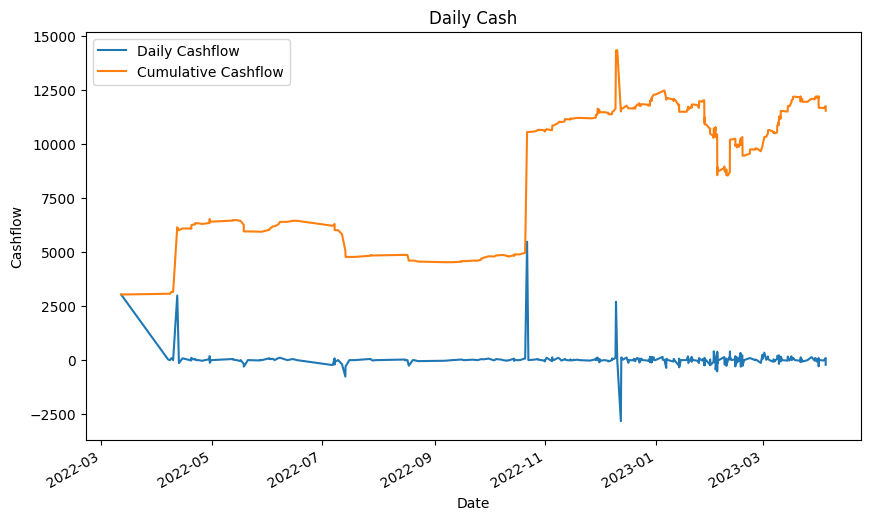

In [19]:
# Create a line chart of the daily cashflow and cumulative profit or loss using matplotlib. 
# You can use the plot method to create a line chart.
fig, ax = plt.subplots(figsize=(10, 6))
daily_pl.plot(ax=ax, kind='line', label='Daily Cashflow')
cumulative_pl.plot(ax=ax, kind='line', label='Cumulative Cashflow')
ax.set_title('Daily Cash')
ax.set_xlabel('Date')
ax.set_ylabel('Cashflow')
ax.legend(loc='upper left')
plt.show()

Now this look quite impressive, but it contains over $ 11.000 in deposits and interests paid. So to get a clearer picture of progress made, I need to capture trades only.

In [20]:
# Group the trades by date and calculate the total cashflow for each day for trades only. 
# Use the groupby method to group the trades by date and the sum method to calculate the total cashflows for trades only.
new_df_trades = new_df[new_df['Type'] != 'Money Movement']
daily_pl_trades = new_df_trades.groupby('Date')['Value incl Fees'].sum()

In [21]:
# Calculate the cumulative cashflow for each day using the cumsum method:
cumulative_pl_trades = daily_pl_trades.cumsum()

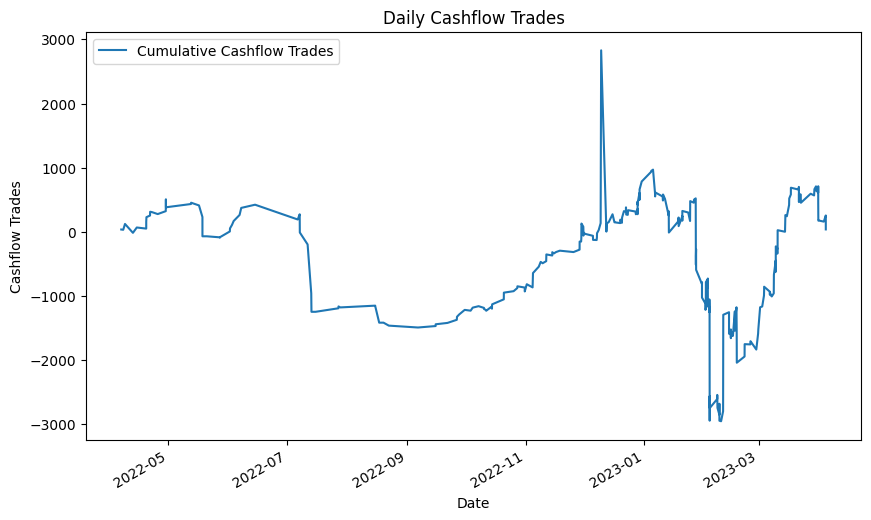

In [22]:
# Create a line chart of the daily cashflow and cumulative profit or loss using matplotlib. 
# You can use the plot method to create a line chart.
fig, ax = plt.subplots(figsize=(10, 6))
#daily_pl_trades.plot(ax=ax, kind='line', label='Daily P/L Trades')
cumulative_pl_trades.plot(ax=ax, kind='line', label='Cumulative Cashflow Trades')
ax.set_title('Daily Cashflow Trades')
ax.set_xlabel('Date')
ax.set_ylabel('Cashflow Trades')
ax.legend(loc='upper left')
plt.show()

Now I want to create a dataframe out of the above where I can see trades, money movements per week, month and year

In [23]:
# Group by month and calculate the sum of values for each month of all costs (so including commissions and fees)
range_new_df = new_df.loc[(new_df['Date'] >= '2022-01-01') & (new_df['Date'] <='2023-12-31') & (new_df['Value incl Fees'])]
trades_range_new_df = new_df.loc[(new_df['Date'] >= '2022-01-01') & (new_df['Date'] <='2023-12-31') & (new_df['Value']) & (new_df['Type'] == 'Trade')]

# Group the filtered DataFrame by month using the groupby() method and the pd.Grouper() function. 
# We also apply the sum() function to the 'Value incl Fees/Value' column to get the total value for each month. 
# We reset the index using the reset_index() method to get a DataFrame with the 'Date' and 'Value incl Fees/Value' columns.

# Group the DataFrame by day,week, month, and year and calculate the sum of items, so  'Value incl Fees' for each period and reset index:
total_sum_df_day = range_new_df.groupby(pd.Grouper(key='Date', freq='D')).agg({'Value incl Fees':'cumsum'}).reset_index
total_sum_df_week = range_new_df.groupby(pd.Grouper(key='Date', freq='W')).agg({'Value incl Fees':'cumsum'}).reset_index
total_sum_df_month = range_new_df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Value incl Fees':'cumsum'}). reset_index
total_sum_df_year = range_new_df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'Value incl Fees':'cumsum'}).reset_index

# Group the DataFrame by day,week, month, and year and calculate the sum of Trades, incl Commissions and Fees ,so 'Value incl Fees' for each period and reset index:
trades_sum_df_day = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='D')).agg({'Value incl Fees':'cumsum'}).reset_index
trades_sum_df_week = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='W')).agg({'Value incl Fees':'cumsum'}).reset_index
trades_sum_df_month = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Value incl Fees':'cumsum'}). reset_index
trades_sum_df_year = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'Value incl Fees':'cumsum'}).reset_index

# Group the DataFrame by week, month, and year and calculate the sum of Trades only, without fees, so 'Value' only for each period and reset index:
net_trades_sum_df_week = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='W')).agg({'Value':'cumsum'}).reset_index
net_trades_sum_df_month = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Value':'cumsum'}). reset_index
net_trades_sum_df_year = trades_range_new_df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'Value':'cumsum'}).reset_index



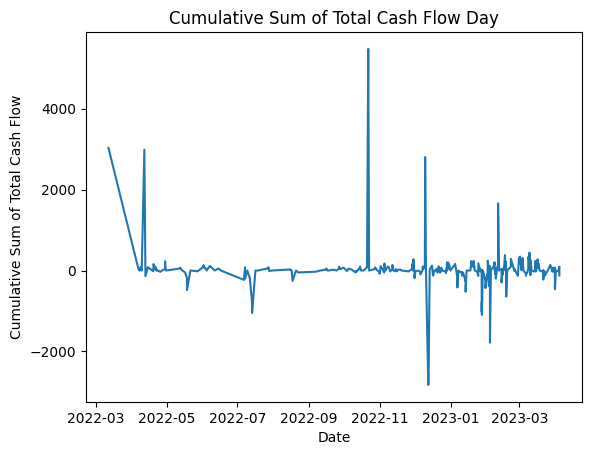

In [24]:
# Filter the DataFrame based on the specified criteria

# Set the 'Date' column as the index of the DataFrame
range_new_df = range_new_df.set_index('Date')

# Group the DataFrame by week and calculate the cumulative sum of 'Value incl Fees' for each day
total_sum_df_day = range_new_df.groupby(pd.Grouper(freq='D')).agg({'Value incl Fees':'cumsum'}).reset_index()

# Plot the data
plt.plot(total_sum_df_day['Date'], total_sum_df_day['Value incl Fees'])

# Set the title and axis labels
plt.title('Cumulative Sum of Total Cash Flow Day')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum of Total Cash Flow')

# Show the plot
plt.show()

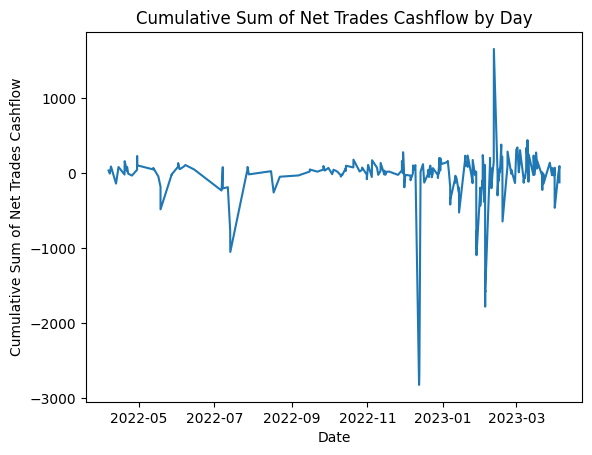

In [25]:
# Filter the DataFrame based on the specified criteria

# Set the 'Date' column as the index of the DataFrame
trades_range_new_df = trades_range_new_df.set_index('Date')

# Group the DataFrame by week and calculate the cumulative sum of 'Value incl Fees' for each day
trades_sum_df_day = trades_range_new_df.groupby(pd.Grouper(freq='D')).agg({'Value incl Fees':'cumsum'}).reset_index()

# Plot the data
plt.plot(trades_sum_df_day['Date'], trades_sum_df_day['Value incl Fees'])

# Set the title and axis labels
plt.title('Cumulative Sum of Net Trades Cashflow by Day')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum of Net Trades Cashflow')

# Show the plot
plt.show()